/home/figgeous/PycharmProjects/algdes-labs/red-scare/graph_info


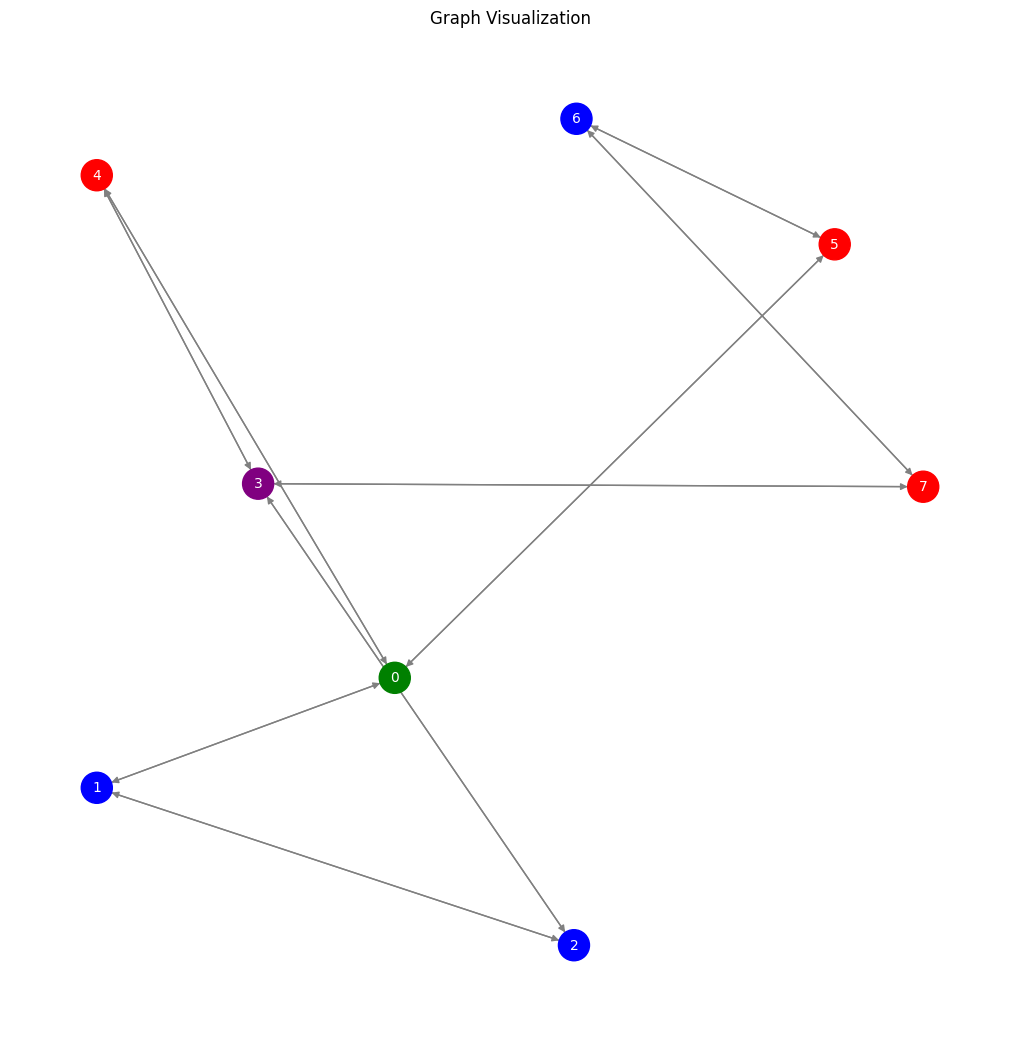

In [2]:
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt

def read_graph_data(file_path):
    with open(file_path, 'r') as file:
        # Read first line for n, m, and n_of_r
        n, m, n_of_r = map(int, file.readline().strip().split())
        
        # Initialize adjacency matrix and dictionaries
        adj_matrix = [[0] * (n + 2) for _ in range(n + 2)]
        red_nodes = []
        name_vertex_map = {}

        # Read source and target names
        source_name, target_name = file.readline().strip().split()

        # Read each node's data and populate name_vertex_map and red_nodes
        for i in range(n):
            temp = file.readline().strip().split()
            node_name = temp[0]
            name_vertex_map[node_name] = i
            if temp[-1] == "*":
                red_nodes.append(i)

        # Set source and target
        source = name_vertex_map[source_name]
        target = name_vertex_map[target_name]

        # Read edges and populate adjacency matrix
        edges = []
        for _ in range(m):
            u, direction, v = file.readline().strip().split()
            edges.append((u, direction, v))
            if direction == "--":
                adj_matrix[name_vertex_map[u]][name_vertex_map[v]] = 1
                adj_matrix[name_vertex_map[v]][name_vertex_map[u]] = 1
            elif direction == "->":
                adj_matrix[name_vertex_map[u]][name_vertex_map[v]] = 1
            elif direction == "<-":
                raise NotImplementedError("This direction is not supported")

    return n, m, n_of_r, edges, source_name, target_name, red_nodes, name_vertex_map

def visualize_graph(n, m, n_of_r, edges, source_name, target_name, red_nodes, name_vertex_map):
    G = nx.DiGraph()

    # Add nodes to the graph with colors
    for node_name, idx in name_vertex_map.items():
        G.add_node(node_name, color='red' if idx in red_nodes else 'blue')

    # Add edges based on adjacency matrix data
    for u, direction, v in edges:
        if direction == "--":
            G.add_edge(u, v)
            G.add_edge(v, u)
        elif direction == "->":
            G.add_edge(u, v)

    # Set color map for nodes
    color_map = []
    for node in G:
        if node == source_name:
            color_map.append('green')
        elif node == target_name:
            color_map.append('purple')
        elif name_vertex_map[node] in red_nodes:
            color_map.append('red')
        else:
            color_map.append('blue')

    # Adjust the layout parameters
    pos = nx.spring_layout(G, k=2.0, scale=2.0, iterations=50)

    # Increase the figure size
    plt.figure(figsize=(10, 10))

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=500, font_size=10, font_color='white', edge_color='gray')
    plt.title("Graph Visualization")
    plt.show()

# Main function
if __name__ == "__main__":
    print(os.getcwd())
    filename = "G-ex.txt"
    file_path = f"../data/{filename}"
    # Read data from the file and visualize the graph
    graph_data = read_graph_data(file_path)
    visualize_graph(*graph_data)